In [203]:
#from pyprocessmacro import Process
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


dir = "C:/Users/foresight_User/Desktop/公司文件/4.CIT季賽/測試資料/"
# data = pd.read_csv(dir+"CH_TO.csv").drop(columns=["Context Name"])
# data.columns = list(map(lambda x: "x_" +str(x) ,range(len(data.columns)-1)))+["Y"]
feature = pd.read_csv(dir+"wb/Indicator_Data(1).csv").drop(columns=["Unnamed: 74","Context Name"])#.to_numpy()
target = pd.read_csv(dir+"wb/Metrology_Data(1).csv")[["Point1"]]#.to_numpy()
feature.columns = list(map(lambda x: "x_" +str(x) ,range(len(feature.columns))))
target.columns = ["Y"]
data = pd.concat([feature,target],axis=1)

reg = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.33, random_state=42)
reg.fit(X_train, y_train)
r2_score(y_test, reg.predict(X_test))

0.894404338007281

In [9]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

In [10]:
from sdv.single_table import GaussianCopulaSynthesizer
synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    numerical_distributions={
        'x_0': 'norm',
        #'x_1': 'beta',
        #'x_2': 'truncnorm',
        #'x_3': 'uniform',
        #'x_4': 'gamma',
        #'x_5': 'gaussian_kde'
    },
    default_distribution='norm'
)



synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)

#synthetic_data = synthesizer.sample(num_rows=10)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sdv\single_table\base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthesizer.add

In [17]:
# constraint_list = []
# for col in data.drop(columns=["Y"]).columns:
#     constraint = {
#         #'constraint_class': 'ScalarRange',
#         #'table_name': 'guests', # for multi table synthesizers
#         #'constraint_parameters': {
#         #    'column_name': col,
#         #    'low_value': data[col].min(),
#         #    'high_value': data[col].max(),
#         #    'strict_boundaries': False
#         }
#     }
    
#     try:
#         synthesizer.add_constraints(constraints=[constraint])
#         constraint_list.append(constraint)
#     except:
#         print(col) # 無法設置限制的

In [11]:
from sdv.sampling import Condition
condition_list = []
for y in data["Y"].to_list():
    c = Condition(
        column_values={"Y":y},
        num_rows=10
        )
    condition_list.append(c)

In [12]:
synthetic_data = synthesizer.sample_from_conditions(
    conditions=condition_list,batch_size=50,max_tries_per_batch=500
)

Sampling conditions: 100%|██████████| 7280/7280 [03:18<00:00, 36.73it/s]


In [46]:
# synthesizer.sample_from_conditions(
#     conditions=condition_list,batch_size=50,max_tries_per_batch=500
# ).sample(num_rows=10)

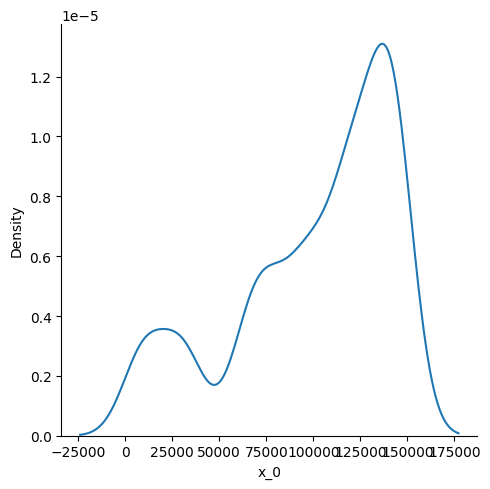

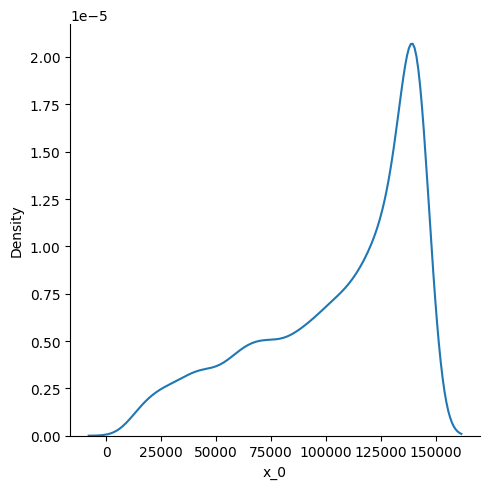

In [47]:
import seaborn as sns
sns.displot(data[['x_0']], x="x_0", kind="kde")
sns.displot(synthetic_data[['x_0']], x="x_0", kind="kde")

In [13]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=data.drop(columns=["Y"]),
    synthetic_data=synthetic_data.drop(columns=["Y"]),
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 74/74 [00:00<00:00, 2055.45it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 500.04it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [14]:
from sdv.evaluation.single_table import evaluate_quality

metadata_drop_target = SingleTableMetadata()
metadata_drop_target.detect_from_dataframe(data.drop(columns=["Y"]))

quality_report = evaluate_quality(
    real_data=data.drop(columns=["Y"]).reset_index(drop=True),
    synthetic_data=synthetic_data.drop(columns=["Y"]).reset_index(drop=True),
    metadata=metadata_drop_target)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 73/73 [00:01<00:00, 55.67it/s]|
Column Shapes Score: 73.99%

(2/2) Evaluating Column Pair Trends: |██████████| 2628/2628 [00:18<00:00, 140.66it/s]|
Column Pair Trends Score: 88.94%

Overall Score (Average): 81.46%



In [2]:
from sdv.single_table import CTGANSynthesizer

# synthesizer = CTGANSynthesizer(metadata)
# synthesizer.fit(data)

# synthetic_data = synthesizer.sample(num_rows=10)

In [3]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

In [4]:
data = data.astype(float)

In [5]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

# strict_boundaries: Whether the column must be strictly in between the low and high values
# (default) True
# The column must be strictly greater than the low value, and strictly less than the high value.
# False
# The column must be greater than or equal to the low value, and less than or equal to the high value.






constraint_list = []
for col in data.drop(columns=["Y"]).columns:
    constraint = {
        'constraint_class': 'ScalarRange',
        #'table_name': 'guests', # for multi table synthesizers
        'constraint_parameters': {
            'column_name': col,
            'low_value': data[col].min(),
            'high_value': data[col].max(),
            'strict_boundaries': False
        }
    }
    
    try:
        synthesizer.add_constraints(constraints=[constraint])
        constraint_list.append(constraint)
    except:
        print(col) # 無法設置限制的


x_6
x_17
x_28
x_37
x_45
x_51
x_62


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sdv\single_table\base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [31]:
#synthesizer.get_constraints()

In [6]:
synthesizer.fit(data)

Gen. (-3.90) | Discrim. (-0.18): 100%|██████████| 500/500 [01:44<00:00,  4.79it/s]


In [33]:
synthesizer.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.114957,0.000446
1,1,1.112113,-0.108321
2,2,1.273907,-0.230570
3,3,1.260769,-0.376682
4,4,1.281958,-0.499187
...,...,...,...
495,495,-3.645929,0.308047
496,496,-3.986665,0.187606
497,497,-4.225647,0.177687
498,498,-3.960498,-0.070132


In [7]:
from sdv.sampling import Condition
condition_list = []
for y in data["Y"].to_list():
    c = Condition(
        column_values={"Y":y}
        )
    condition_list.append(c)

In [9]:
synthetic_data = synthesizer.sample_from_conditions(
    conditions=condition_list,batch_size=50,max_tries_per_batch=500
)

Sampling conditions: 100%|██████████| 728/728 [1:30:17<00:00,  7.44s/it]


In [15]:
# 原始PACKAGE叫做modal
# 要去把黨名改成modAL
import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [16]:
X_train #= X_train
X_unlabeled = synthetic_data.drop(columns=["Y"])
y_train = y_train
y_unlabeled = synthetic_data["Y"]

In [22]:
def GP_regression_std(regressor, X):
    _, std = regressor.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]

In [37]:
def uncertainty_sampling_regression(learner, X_pool):
    # Predict variance
    variance = np.var([tree.predict(X_pool) for tree in learner.estimator.estimators_], axis=0)
    # Choose sample with maximum variance
    query_idx = np.argmax(variance)
    
    # Check if X_pool is a DataFrame and handle indexing accordingly
    if isinstance(X_pool, pd.DataFrame):
        X_pool_array = X_pool.to_numpy()  # Convert DataFrame to NumPy array
        return query_idx, X_pool_array[query_idx]
    else:
        return query_idx, X_pool[query_idx]

In [67]:
learner = ActiveLearner(
    estimator=RandomForestRegressor(n_estimators=100),
    query_strategy=uncertainty_sampling_regression,
    X_training=X_train.to_numpy(),
    y_training=y_train.to_numpy()
)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [73]:
r2_score(y_test,learner.predict(X_test))

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.8969644394746804

In [94]:
y_unlabeled[i]

array([69.495, 69.495, 69.495, ..., 66.764, 66.764, 66.764])

In [96]:
candidate_sample

array([[ 1.28119740e+05,  7.54828000e+03,  2.50000000e+01,
         4.36692000e-01,  4.48216230e+04,  2.91761430e+04,
         8.60000000e+01,  4.21200000e+04,  2.56962300e+01,
         1.77339000e-01,  3.40944800e+03,  4.53158900e+03,
         1.71390034e+03,  1.04632219e+04,  1.16550715e+02,
        -2.38013500e+00,  1.92661624e+02,  8.90000000e+01,
         1.99686840e+01,  3.55468700e+00,  2.98500000e+02,
         1.60000000e+00,  7.15000000e-04,  5.77186000e-01,
         1.49205887e+04,  1.85997067e+02,  3.00112400e+02,
         4.54982600e+00,  8.70000000e+01,  4.32300000e+04,
         2.50919150e+01,  1.99995575e+03,  4.53159700e+03,
         4.19705241e+02,  2.61357100e+01, -5.50000000e-04,
         4.84345000e+00,  8.90000000e+01,  1.99666750e+01,
         3.01721400e+02,  3.00007363e+02,  2.61467530e+01,
         8.00000000e-01,  2.19992000e-01,  9.15556800e+02,
         8.90000000e+01,  1.99730360e+01,  1.87988300e+01,
         0.00000000e+00,  7.01630000e-02,  2.99973190e+0

In [97]:
learner = ActiveLearner(
    estimator=RandomForestRegressor(n_estimators=100),
    X_training=X_train.to_numpy(),
    y_training=y_train.to_numpy()
)

initial_r2 = learner.score(X_unlabeled, y_unlabeled)
print(f'Initial R²: {initial_r2:.4f}')



c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Initial R²: 0.5255


In [116]:
selected_samples = []

In [117]:
.shape

(487, 73)

0.8910881829100534

In [139]:
xxxxxx = np.array([]).reshape(1,-1)

In [160]:
xxxxx = np.array([]).reshape(1,-1)
xxxxx = np.append(xxxxx,candidate_label)

In [162]:
xxxxx = np.append(xxxxx,candidate_label)

In [164]:
xxxxx.shape

(2,)

In [167]:
X_train.shape

(487, 73)

In [170]:
X_unlabeled[i].reshape(1,-1).shape

(1, 73)

In [180]:
selected_feature = np.empty((0, X_train.shape[1]))
selected_target = np.empty((0, y_train.shape[1]))

In [195]:
reg.score(X_test,y_test)

0.8910881829100534

In [200]:
#.shape

array([[ 1.42168470e+05,  7.83153000e+03,  3.48000000e+02, ...,
         6.91500000e+01,  1.09301187e+03, -1.42164271e+05],
       [ 9.26112200e+04,  5.73887800e+04,  2.18000000e+02, ...,
         5.57230000e+01, -9.00474918e+04,  2.16399310e+04],
       [ 1.16483990e+05,  3.35160100e+04,  2.18000000e+02, ...,
         5.54610000e+01,  9.25912493e+04, -7.06780137e+04],
       ...,
       [ 1.38739520e+05,  7.80205000e+03,  2.50000000e+01, ...,
         6.64791400e+01,  1.03956877e+05,  1.34199116e+05],
       [ 1.41431860e+05,  8.99459000e+03,  2.50000000e+01, ...,
         6.82229200e+01, -2.89341507e+04,  6.24227829e+04],
       [ 1.39049110e+05,  7.95332000e+03,  2.50000000e+01, ...,
         6.48199700e+01, -8.41374601e+04,  6.23101214e+04]])

In [201]:
reg.score(np.vstack((X_test.to_numpy(), selected_feature)),np.vstack((y_test.to_numpy(), selected_target)))

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9693596613470097

In [202]:
reg.score(selected_feature,selected_target)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9806339739222351

array([[ 1.41395680e+05,  7.33785000e+03,  2.50000000e+01, ...,
         7.12930600e+01, -6.92770001e+04, -1.28466053e+05],
       [ 1.42300740e+05,  7.85577000e+03,  2.50000000e+01, ...,
         6.68046500e+01, -3.00243161e+04, -1.00637910e+05],
       [ 1.40472130e+05,  9.53792000e+03,  2.50000000e+01, ...,
         6.66248100e+01, -2.83603734e+04, -6.76695057e+04],
       ...,
       [ 1.38739520e+05,  7.80205000e+03,  2.50000000e+01, ...,
         6.64791400e+01,  1.03956877e+05,  1.34199116e+05],
       [ 1.41431860e+05,  8.99459000e+03,  2.50000000e+01, ...,
         6.82229200e+01, -2.89341507e+04,  6.24227829e+04],
       [ 1.39049110e+05,  7.95332000e+03,  2.50000000e+01, ...,
         6.48199700e+01, -8.41374601e+04,  6.23101214e+04]])

In [191]:

initial_r2 = reg.score(X_test,y_test)
improvement_threshold = 0.01  # 設定提升R²的閾值
selected_feature = np.empty((0, X_test.shape[1]))
selected_target = np.empty((0, y_test.shape[1]))
for i in range(len(X_unlabeled)):
    # 評估添加每個樣本後的R²變化
    candidate_feature = X_unlabeled[i].reshape(1, -1)
    candidate_target = y_unlabeled[i].reshape(1, -1)

    # 暫時增加樣本
    if selected_feature.size != 0 and selected_target.size != 0:
    #learner.teach(candidate_sample, candidate_label)
        X_new = np.vstack((X_test.to_numpy(), candidate_feature,selected_feature))
        y_new = np.vstack((y_test.to_numpy(), candidate_target,selected_target))
    else:
        X_new = np.vstack((X_test.to_numpy(), candidate_feature))
        y_new = np.vstack((y_test.to_numpy(), candidate_target))
    new_r2 = reg.score(X_new, y_new)
    # 檢查R²是否顯著提升
    if new_r2 > initial_r2:
        selected_feature = np.vstack((selected_feature, candidate_feature)) #np.append(selected_feature,candidate_feature).reshape(1, -1)
        selected_target  = np.vstack((selected_target, candidate_target)) #np.append(selected_target,candidate_target).reshape(1, -1)
        initial_r2 = new_r2  # 更新R²基準
        print(initial_r2)
        
    # else:
    #     # #print("HHHHH",selected_samples)
    #     # # 如果沒有顯著提升，回退模型
    #     # learner = ActiveLearner(
    #     #     estimator=RandomForestRegressor(n_estimators=100),
    #     #     X_training=np.vstack((X_train.to_numpy(), X_unlabeled[selected_samples])),
    #     #     y_training=np.vstack((y_train.to_numpy(), y_unlabeled[selected_samples].reshape(-1,1)))
    #     # )

    # # 打印當前模型性能
    #print(f'Iteration {i+1}, New R²: {new_r2:.4f}')

# 打印選擇的樣本索引
#print("Selected samples that significantly improve R²:")
#print(selected_samples)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.8911279104945539
0.8914579491189272
0.8925520294999907
0.8935469741215083
0.8937753707151681
0.8941931775096821
0.8944817784450962
0.8947064240261311
0.8948230006586164
0.8948620260481933


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.8950191354349369


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.8950377692996669
0.8950504778329232
0.8955241259939865
0.8960594473529571
0.8967763991669498
0.8974377171848583
0.897515873028232
0.8980624887857679
0.8986634757261912
0.8987535620496785
0.8992993422989589
0.8996384187081563
0.8997520206085117
0.8998640429958809


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9001273808148335
0.9001398262997558


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9001493912093266
0.9001514973544225


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9005021908614314
0.9011823027474648
0.9012105737091809
0.901216322048106
0.9013439971211162
0.9014387026418986
0.9019164947744984
0.9023588011017218
0.902838734750544
0.9034582324900998


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9034912611283845
0.9035042483693729
0.9035100921111547
0.9036110577744574
0.9037604081500423


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9039061476309667
0.9039531917967584


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9039820599438695
0.9039844571240798
0.904072026908384
0.9040908285699257
0.9042329559332005
0.9043761955502415


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9044506871508181
0.9044849075844354


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.904716323235854
0.9049559474393727
0.9053204071326101
0.9057114310281582
0.9061150935104734
0.9063179270924137
0.9067069907511519


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9067222932175236
0.9067558723547483
0.9067640165873259
0.906820515451363
0.9068319777854646
0.9068374106572574


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9068547271139187
0.9068586922365338


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9073099470302488
0.9075352160547325
0.9078927976465352
0.9078947792593878
0.9082957307826096
0.9086345945947246
0.908757080846551
0.908925429861396
0.9089387727385188
0.9089758033680517


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9091736745772786
0.9092118889564295
0.909417316229624
0.9095987372986324
0.9096782102760024
0.9098731289479143
0.9100536430445266
0.910252476659406
0.9102829401707224
0.9104659860568618
0.9105895210765376
0.9108062015067581
0.9108464583289115
0.9109854951701153
0.9111699129496509
0.9112428462127158


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.911466994916615
0.9116112335207528
0.9116852275822186
0.9118608509422625
0.9120694310342085
0.9122668467000873
0.9124726040618666
0.9126804467755728
0.9128739958593638
0.913086177337861
0.9133059263422849
0.9133526579683937
0.9134260744946883
0.9135503495544891
0.9136818444299749
0.9138312799907855


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9140123506396173
0.9140194007619896
0.9141259573740971
0.9142944243428758
0.9144483849783142
0.9146847127730238
0.9150289444465942
0.9153268214261581
0.9156557574965248
0.9156621626886039
0.9157127844401461
0.9159671190994197
0.9162068716367551
0.9164279483536026


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9164403001522486
0.9170057029924101
0.9172449100306543
0.9174320092985264
0.917906390800416


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9180470158859024
0.918206826892179
0.9183219084843677
0.9184780686777445
0.9185546537429123
0.9186176304929476
0.9187910955213844
0.9189649893396012
0.9190705720707113
0.9190823601882856
0.9191340435519174
0.919211782180642
0.9192754407181101
0.9194282203116305
0.9194878745144477


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9195293899074627
0.9195351881585551
0.9196657401082858
0.9197853188701364
0.9198438501933434
0.9198660311588994
0.9199125189438
0.9199511071461809
0.9200201178962376
0.9200792107652149


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9201251763850944
0.9201579982077407
0.9203497735224485
0.920352151631535
0.9204219426412755
0.9206289266769315
0.9207806101261498
0.9210085814035425


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9212233897160178
0.9213926096753225
0.9214316915470321
0.9214816029089566
0.9217067787095778
0.9218625615090448
0.921963491860064
0.9221257135624703


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9222064945685418
0.9223241951876285
0.9224480144685319
0.922562094358111


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.922581675170434
0.9226027881579082
0.9226288358803902
0.9226514325784836
0.9226808920848468


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9226818728323922
0.9226923901597102
0.9228359483583813
0.9229839308314782
0.9231906509872829
0.9233946770298682


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9236942406775143
0.9240308192162247
0.9242425872762579
0.9245778469789858
0.9245906369768595
0.924649096770455


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9246702455502391
0.9247004503278424
0.9247255198950011


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9247767245614466
0.9248256858921263
0.9248611545836545
0.9250804882340725
0.9252501846954264


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9252974867813437
0.925346923661749
0.9253530349321551
0.9253925667803035
0.9254524181247812
0.9255015760189717
0.925569032308842
0.9256624657550612
0.9257492186017731
0.9258358265470898
0.9258473104942987


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9259362883941124
0.9260389487289703
0.9261551232460669
0.9262300540126543
0.9262532789514039


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9263120039034973
0.9263686866474271
0.9264237191600061
0.9264766003708131
0.9265089139703397
0.9265186194558045


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9265467980153035
0.9265716825066166
0.9265987171084287
0.9266282468926458
0.9266449971659053
0.9267488488162662


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9271185632324082
0.9271408072744892
0.9271918531646437
0.9271986750604913
0.9272223166713514
0.9272625477512177
0.9272704436067313


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9275058935859243
0.9277350214881293
0.9278412786844055
0.927903193967291
0.9280038618678522
0.9280729880052587
0.9282861336916092
0.9284611148873777


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9285657782396242


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9285717127368568


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9285719296269795
0.9286664862486053


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9286884337143637
0.9287292253776704
0.9287333431473398


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9288928348694314
0.9291806532302627
0.9293567068954922
0.929383468559089
0.9295812438498822
0.9297356778158713
0.9298563919840261
0.9299958326552276


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9300298396034787
0.9301667931978221
0.930307995209967
0.9303901754339614


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9304164850003088
0.930550865598665
0.930582731139729


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9305989042060668
0.930633809921029
0.9308555399022518
0.9310850927442402
0.931245899606095


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9313376165776898
0.9314171968531462
0.93147963767872
0.9315769384794205
0.931667327512248
0.9316775983672808
0.9317720741083513
0.9318244744388317
0.9319907865849189
0.9322164531120261


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9322730795096116


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9323698949211543
0.9324672510612555
0.9324977860360787
0.932529342080768


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9325305807968589
0.9325540586284838
0.9325810772110724
0.9326830254343074
0.9327223884451995
0.9328879740635379


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.932969080961228
0.9330673719069755
0.9331432253369053
0.9332543294461036
0.9332706071489021
0.9333313412112474
0.9333652453092366
0.9334177834785972
0.9334882808557154
0.9335213642622838
0.933707554668046
0.9338541994713454


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9340175122813029
0.9341468960942403
0.9342183618284134
0.9342381181927701
0.9343003940805101
0.9343425764717198
0.9343870615910856
0.9344129973220023
0.9344624270854344
0.9344734051427294
0.9346273126413518
0.934783231977419
0.9349180299416973


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9349487680304214
0.9350133661117443
0.9350880769209592
0.9351501189703599
0.9351720984026076
0.935342418544288


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9354849936729803
0.9356306691446521
0.9356629353212954
0.9357071845229462
0.9357511670564461
0.9357950966946851
0.9358367918790339
0.9358431606824107
0.9358504016603006
0.9358547007262068


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9359685031729994
0.9359823890436039
0.9361095484178704
0.9362332793186356
0.9363595177025991
0.936421410728484
0.9364845974303718
0.9364951626687249
0.9365328965097265
0.9366179366982055
0.9366435832563507


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9367018065195046
0.9367668672179318
0.9368014813927102
0.9368088273792456
0.9368526951377545
0.9369100940991916
0.936916332240491
0.9370159480844121
0.9371806335996566
0.937328603366286


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9374620155644605
0.937518257538159
0.9375318956180146
0.9376200483805446
0.9377203252590145
0.9378296334085607
0.9379429144753079
0.9380565081392566
0.9381040762003625


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9383179985064093
0.9384458921759903
0.938506671977768
0.9387115519377572
0.9389063738996001
0.9390926170813592
0.9391345216418892
0.9391455013338312


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.939218541158456
0.9392417887681788
0.9393145305289705
0.9394264514137779
0.9395335981843022
0.9395796933064355
0.939675155276568


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.939799796704229
0.9398101562446239
0.9398735473418341
0.9399358591287549
0.9400166994028414
0.940067088727374


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.940129598268258
0.940182291872921
0.9402408200011881
0.940292291225338
0.9403375220204877
0.9403457227090691
0.9403507190955388
0.9404220405344613
0.9405525315239511


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9406052929974246
0.9406233728984154
0.940713460654448
0.9408192735933958
0.9409609413489128
0.9410884467961168
0.9411400963514512
0.9412213148592082


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9413013400663381
0.9413897845461541
0.9414712572532882


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9415609983860079
0.9417151914079164
0.9417354385461268
0.9417635990740068
0.9417651976930452


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9418358833974544
0.9418571761818436
0.9418809537189258
0.9419559238240778
0.9419872589252916
0.9420014990572166
0.9420530365719142
0.9420681374132659
0.9420717870070879
0.942116162551123


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9421194946824978
0.9421852224254393
0.9422368372521204
0.942290228964339
0.9423445113344157
0.9423940549318056
0.942417059502782
0.9424830246190736
0.9425285430429716
0.9425656122396688


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9426051993780127
0.9427084379309797
0.9427265986667842
0.942807793045063
0.9429120210798977
0.943015968539558
0.943024126098063


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9430311127047902
0.9430942809946291
0.943105959112755
0.9431727440783411
0.9432081122931856
0.9432137378338837


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.943227087596801
0.9433016815686625
0.9434081040383752
0.9434966527511001
0.9435183142788641
0.9435426508169886


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9435569141234768
0.9435622285029346
0.9435643571994486
0.9436070768423239
0.9437153116706278
0.9438011359342138
0.9438867147872012
0.9439597530222729
0.9440338753371394
0.9441081187588781


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9441466425765566
0.9442052187417251
0.9442626242133405
0.9443075396779566
0.9443641759591823
0.9443830622281171
0.9443885634352112
0.9444118656916066
0.9444226478047384
0.944458748466405
0.944486934095672
0.9446190338884566
0.9447323467185962
0.9448210477137415
0.9449193647255643
0.945047229671846
0.9451182951857241
0.9452028469356203
0.9452662410807099
0.9453177814518136


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.945326003554396
0.945354058122316
0.9454975748297103
0.9456258682136489
0.9457618589929019
0.9457762783596386
0.9458418904032323
0.9458467096412564


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9458745173077214
0.9459390732066747
0.9460021135336656
0.9460724342934994
0.9461518426639672
0.9462211703467699
0.946250802433518


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9462807772295797
0.9462954745311678
0.9463120023915701
0.9463668225536732


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9464249088471257
0.9464522329785654
0.9464548187039525
0.9465008847241442
0.9465074759915717
0.9465104257443853
0.9465378823969559


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9465515728579214
0.9465670330046749
0.9465846934587366
0.9466019173986395
0.9466254295958325
0.9466459997347006
0.9466497753573586
0.9466732637742079


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9466959022079487
0.9467297200693041
0.9468842448406352
0.9470196216982077
0.9470464046104651
0.9471619423971459
0.9473176782473525
0.9473207819117421
0.9473977990863366


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9474685986876725
0.9475228644124183
0.9475690453430821
0.9476450234221565
0.9476649796174147
0.9477220428247037
0.9477914684190843
0.9478536573294946


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9479373107201817
0.9479811101035098
0.94804533902716
0.9480601425440195
0.9481950889624463
0.9483346746417738


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9484719254618039
0.9485995935209961
0.9486298089362213
0.948638352316392
0.9486457924104605


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.948664294158128
0.9486663368785225
0.9487364870781186


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9487756590582276
0.948852725220041
0.9489238485356737
0.9489860815595156
0.9489933159479308
0.9490690357252909
0.9491321498849663


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9491552185020592
0.9492309421013329
0.9493075505669257
0.9493807752172625
0.9494132444378222


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9494340801764852
0.9494597092826824
0.9494756697713967
0.9494963770570318
0.9495164145529124
0.949538391895532
0.9495759790381458
0.9496221661145978
0.9496788833015201
0.949732195499338
0.9497918652879194
0.949847544586202


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9498635336736693
0.9499450205457983
0.9500058701301626
0.9500373892038395


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9501002605953843
0.9501065718767153
0.9501208479910324
0.950125460834927


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9501375929619962
0.9501427802698144
0.9501583297429839


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9501875048770944
0.9502119378702418
0.9502330627412826
0.9502509318279756
0.950256002773077


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9502591160776472
0.9502723308570351
0.9502808236236697


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9502913833181489
0.9503520929813215
0.9503703280406912
0.9503844114566917
0.950402612851023
0.9504034235037682
0.9504155216865586


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.950523075979272
0.9506562723021375
0.9507727713522929
0.9508063691069015
0.9508355877113441


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9508826132187549
0.9509455452952499
0.9510333729352066
0.9511113149458712
0.9511901043282109
0.9512738215791741


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9513072273933563
0.95133674900429
0.9513713371236266
0.9513911308242697
0.9514034549470185
0.9514115218352917


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9514243216274259


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.951431660570013
0.9514369410509262
0.9515739446003626


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9515797804526579
0.9515956518512626
0.9516865034157752
0.9517157889997461
0.9517413223708585
0.951750256735165
0.9517691850396427


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9517724219258994
0.9517882228996241
0.9518021769107512
0.9518174110333966
0.9518755543551686
0.9518761735618164
0.9519508894117212
0.9520726375569507


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9521172078561552
0.9521516811227873
0.9521674390294905


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9521725457523487
0.9521758897327421
0.9521908040765461
0.9522033281675142
0.9522386702614265


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9522977873015371
0.9522988903591256
0.9523488393951615
0.9523999523894111


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9524624801692834
0.952521188002517
0.9525829952572162
0.952636487463322
0.952740870966594
0.9528046940072965


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9528071680704067
0.9528639761617187
0.952929871825999
0.9529677118543279


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9529963523808923
0.9530377669068805
0.9530573374908468


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9531678083055207
0.9532593412184794
0.953378702735903
0.9535009157664268


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9535411346297572
0.9535436488621718
0.9535461030239903
0.9535524713689456


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9535647811641504
0.9535849882788594
0.9536048128298293
0.9536221472790474
0.9536591853953658


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9536679693816046
0.9537016775938956
0.9537079512586625
0.9537537870334084
0.9537777667985818
0.9538741110892944
0.9538806692176017
0.9538863832490206


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.953911846498569
0.9539408139273564
0.9539626896433506
0.9539632867816427


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9539728563510979
0.9540155222079961


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.954022410543936
0.9540551036353109
0.9540834969160614
0.9540867985735919
0.9541031328806943
0.9541324104695136
0.9541354287114852


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.954138380561233
0.9541732511638181
0.9542331171498333
0.9542897572454093
0.9543422841721526


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9543909941344411
0.9543927902469977
0.9544131114790535
0.954423695728577
0.9544456864036579


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9544920458014423
0.9545300540318737
0.9545807345007096
0.9545872525131401
0.9545926850725368
0.9546225059954814
0.9546643299424052
0.9546704451301364
0.9546873713913192


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9547615749389131
0.9548186865791545
0.9549139469064549
0.9549540596970157
0.9549819587177418
0.955003449544595
0.9550174497837007


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9550434392352574
0.9550512989474327


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9551283880273425
0.9552016405352626
0.9552348525204165
0.9552707198517603
0.955316945312137
0.955334169218514
0.9553783675965509
0.9553820226755461


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9553994140252574
0.9554515450413137
0.9555067823218641


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9555070470420528
0.9555306928086973
0.955555650178358


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9555761657341892
0.9555978092209525
0.9556803035694752


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9556908178548223
0.9557215532460057
0.9557457378623713
0.9557516965055574
0.9557831209866454
0.9558207216770764
0.9558523480376698
0.9558585799965889
0.9558704457085496


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9559076783382273
0.9559873565336179
0.9560221759198441
0.9560765050234247
0.9561152283583616


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9561531779749415
0.9561803480953279
0.9562235851753623
0.9562686770195471


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9563462990408624
0.9563629284358924
0.956387265423546


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.956391676502113
0.9563957638398374
0.9563983320315026
0.9564103085172522


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9564508688460547
0.9564911351720561
0.95652708455052


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9565429250902263
0.9565459718696331
0.95655677769204
0.9566031695131699
0.9566414873799753


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9566876244458759
0.9567066782156682
0.956733120440064
0.9567790801539569


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9567814196138424
0.9567840995754855
0.9567939559817841
0.9568004923448503
0.9568159426347966


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9568845142989298
0.9569103267214133
0.9569400140169458


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9569611003910578
0.9569890503900164
0.9570062508813546
0.957007916453243


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9570247905218523
0.9570296147647007
0.9570340845254042


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.957084665743521


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9570849585290792
0.9570987429271205
0.9571136125215065
0.9571226383012622


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.957128689151116
0.9571313953609571


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9571457523590439
0.9572196521093224
0.9572920594465766
0.9572960942199522
0.9573592340064919


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9573644544151145
0.9573691005908266
0.9573700759725258
0.9573777868085948
0.9573834317130078
0.957385165837206


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9573987984602872
0.9574054137718784


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9574534741602583
0.9574901832136432
0.9575175729636729
0.957560257352159
0.9575980245240335
0.9576421215363539
0.9576507706568604
0.9576787960005765
0.9577198790212937
0.9577263744348795
0.9577835290185323


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9577844912406425
0.9577850802239252
0.9577931192176622
0.9577970533158554


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9578035986647204
0.957804293832817


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9578091053301148
0.9578115099431
0.9578121639610433


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9578156787756916
0.9578269014800396
0.9578345009922872
0.957842324315547
0.9578565378540218
0.9578694652779278
0.9578719667628156


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9578862336581733
0.9578946385685919
0.9579723997673572
0.9580731642059261
0.9581571358929869
0.9581857380746404
0.9582025160808652


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9582202453767487
0.958298048068839
0.9583478520095547
0.9584122438526262
0.9584813200290903
0.9585097132360811


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9585116277257677
0.9585149023255741


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9585199158499096
0.9585240585583439
0.9585366978287262
0.9585509921674558
0.9585737275399671
0.9585792293310296


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9585924594753991
0.9585942955717165
0.9586013981723854
0.9586084178564122


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9586143048169921
0.9586167380415647
0.9586261095595253
0.9586342677438303
0.9586511157806092
0.9586659336277615


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9586824281846852
0.9586911227587487
0.958729626962595
0.9587640474100902


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9587720228145098
0.9588000459872956
0.9588033374979872


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9588252643575836
0.9588552736946555
0.9588736592932827
0.9588928583239777
0.958900468190182


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9589234494745904
0.9589350865740083
0.9589937775914921
0.959045875980162
0.9590692130550267


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9590868148050709
0.9591039270663828
0.9591047548449186
0.9591221221729486
0.9591400478890222


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9591521399275048
0.9591673578831911
0.9591765951238723


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9592106432886405
0.95924330324968
0.959259000212019
0.9592834408142416


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9593564652098949
0.9593850484210368
0.9594544592109284
0.9595381343018271


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9595560582338207
0.9595633134344553
0.9595884218835288
0.9595890850454263
0.9596059498807308


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9596597198118713
0.9597067051088577
0.9597291312214481
0.9597559093675152
0.9598003883901504
0.9598113565667679
0.9598618749893415
0.9599083509742451


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9599570854868408
0.9600028891320289
0.960012272594387
0.9600251933972891
0.9600287294212436
0.9600387078384763


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9600600319336717
0.9600795420288813
0.9601066507896305


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9601071477720691
0.9601087206252666
0.9601365394695363
0.9601548538167751


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.96017183623658
0.9601726054389065
0.9601862749157517
0.9602414270912148
0.9602921663103589
0.9603517552911747


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9603892376145219
0.9604632928527808
0.9604726486773999


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9605080923910304
0.9605341656924291
0.9605562604555095
0.9606031898507005
0.9606399049833568
0.960687154112721


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9607331725523339
0.9607570154224615


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9608307198832449


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9608313916041056


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9608319976710483
0.9608387937628589


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9608390030484796


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9608409422213504
0.960846501710773
0.960852510222352
0.9608584178738162


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9609072648595695
0.9609558254316607
0.9610042605932745
0.961063378395406


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9611061499742595


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9611170087907278
0.9611174704119455


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9611228163171388
0.9611250534044218
0.9611275721652027
0.9611284013160315
0.9611393950196021
0.9611431013058245
0.9611560399098671
0.9612000680572236


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9612270856549782
0.961256198649048
0.9613365437009171
0.9613523881008668


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9613684502393358
0.9614140968771508
0.961458414047721
0.9615039418176433
0.9615415719492504
0.9615436272094696


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9615737079085646
0.9615750780740057


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9616304402478904
0.9616501801194108
0.9616876337121228
0.9617250215606652
0.9617420724771006


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9617743668920266
0.9617781525168116
0.9618048001440374
0.9618310565145068
0.9618412077927915
0.961859212862
0.9618871003839122
0.9618907380140403
0.9619122960033826
0.9619408329616268


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9619592618324073
0.9619668515148179


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9619851926702436
0.962016782829413
0.9620361566991935


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9620672646297824
0.9620869920047156
0.962108692283333
0.9621517633252759
0.9621631151317952


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9621838015580385
0.962190818613416
0.9621955990270346
0.9621959069183872


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9622051482265435
0.9622121596467622
0.9622264333360904
0.9622387148920892
0.9622517248462161
0.962266228058929


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.96227755380294
0.9622895352010067
0.9623025790722537
0.9623138276585301


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9623229966045594
0.9623299429377055
0.9623339139968026
0.9623460499130921
0.9623586025283486
0.9623698995197805


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9623876333618235
0.9624081206977446
0.9624132662035174
0.9624398186146794


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9624694051042835
0.9624875752631935
0.9625004349107047
0.9625130259372138
0.9625172869455306
0.9625178419940702


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9625738028184003
0.9625918148111089
0.9626305579556823
0.962655331977058


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9626802387415943
0.9627056481131273
0.9627492516371303
0.9627928250929971
0.9627931608592132


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9627981211548519
0.962805068781146
0.9628117020113932
0.962813949698333
0.9628342597052849


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9628629883712789
0.9628910539678913
0.9629125851093249
0.9629336850062825


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9629569777972325
0.9629735987582576
0.9629975710233385
0.9630115251098701
0.9630174926811791


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9630218028197508
0.9630241340333582
0.9630296463108954


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9630451094965014
0.9630791503335205
0.9631070495044874
0.9631195293721169


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9631492535890679
0.9631680694417932


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9631729845274805


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9631912290154427
0.9631934643813287


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9631947782949387
0.9632073682658879
0.9632195006665111
0.9632292863615495
0.9632304614244578
0.963243968373534


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.963262132553806
0.9632730182463836
0.9632922201552417
0.963312183484383


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9633143873448836
0.9633424768353647
0.9634053844266938
0.9634801139203139
0.9635385595293473
0.9635679210211651
0.9636171573611496
0.9636175612602254


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9636270295592009
0.9636377605327519
0.9636530970042583
0.963659380538513
0.9636689156820286


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9636789838997207
0.9636892562325617
0.9637141138583154
0.9637169261849446
0.9637414888172929
0.9637739248587377


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9637754951973093
0.963776713490856
0.9637814216067809
0.9637921186316926


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9638074323860106


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9638292353320638
0.963842304566938
0.9639025436886401


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9639657101482247
0.9640204221036853
0.9640267219593502
0.9640330167223102


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9640420924034513
0.964057148688374
0.9640790036586084
0.9641469589793763


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9641688517172646
0.9641772116325403
0.964182781808886
0.9641968981487359
0.9642346837709599


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9642537097947386
0.9642574761639495


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.964281659169346
0.9642941403951463
0.9643173272688554
0.9643413342821822
0.9643501002385867
0.9643591265340984


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9643859930774448
0.9644044738353047
0.964407270889509


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.964408825565182
0.9644274643855058


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9644375080431905
0.9644812401708074
0.9644888550038858
0.9645163846983953


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.964533487618593
0.9645626759493748
0.9645962253673573
0.9646326960293078
0.9646692537061389
0.9646997642997802
0.9647032339896742
0.9647092234871842


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9647447837628623
0.96477949027548
0.9647842972077046
0.9647964827605668
0.9648086505611834
0.9648148690972004


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9648355517545032
0.9648496932647671
0.9648670925536416
0.9648835931412902
0.9648992263062884


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9649149660115429


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9649248967150741
0.9649393746775868
0.9649483955499979
0.9649585644581659


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9649621101089446
0.9649718726884462
0.9650194593806533


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9650523405767379
0.9650616479682577


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9650754422369417
0.9650962177861246
0.9651341220714408


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9651397547537836
0.9651756808511948
0.9651772698877004


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9651794990754016
0.9651890627160118
0.9651960654330273
0.9652016553510281


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.965211763903207
0.9652134053945319
0.9652239267772547


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9652333765530783
0.9652432625408465
0.9652535595576028
0.9652632745920915


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9652689053011937


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9652713539897445
0.9652723005829802
0.9652801291922266
0.9652855905018837


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.965293454223439
0.9652935508793128
0.9653013571186416
0.9653089556651631


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9653128906827633
0.9653154214945209
0.9653231093732559


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9653238184177774
0.965332549719379


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9653415780982608
0.9653509776010041


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9653574869455902
0.9653629106339061
0.9653710169379945
0.9653791796066997
0.9653836651880148
0.9653885036943306
0.9653914875132885
0.9653928941305645
0.9653934686606789


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9653972899558285
0.9654257479963354
0.9654546044517524
0.9654631287041878


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9654746192858653
0.9654881732756313
0.9654898052298151
0.9655056734001985


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9655229548370955
0.965539868816507
0.9655621332736211


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9655624390220673


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.965566669649346
0.9655705917417257


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9655789654758556
0.9655874117718796


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9656343756370186
0.9656680668365634
0.9656705728897994


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9656774099354577
0.9656832340793423


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9657207200317388
0.9657740163882227
0.9657992448639843
0.9658396549397907


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9658656540605983


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.965866537608981
0.9658742426015821


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9658910551331459
0.9659082324317149
0.965943011106318
0.965955538172186


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9659808029106123
0.965998616679762
0.9660034752520787


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9660423320791325


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9660433043937362
0.9660461205839791


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9660628991397652
0.9660818014845939
0.9660868012634177
0.9660902143286111


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.966093065732334


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9660981129132304
0.9661100802403331
0.966114626376222
0.9661194561198042


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9661268588042234
0.9661332565883284
0.9661353193203761
0.966142075499268
0.9661429222860278


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9661454198708551
0.9661468242884063
0.96617669333339
0.9662282764166812


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9662498634004316


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9662616096686816
0.9662853353983528
0.9663067801899513


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9663237310811974
0.9663403094122099
0.9663596617361173


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9663646050160706
0.9663721342385487
0.9663725121593933
0.966379518106956


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9663910889284912
0.9664033114361559
0.9664092644595647
0.9664232968610034
0.9664383950572142


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9664478196592011
0.9664560935102271
0.9664646015043075


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9664711812273561
0.9664760453414444
0.966486316000638
0.9664980440408051


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9665077401534078
0.9665174298481564
0.9665235994820968
0.9665332489533222


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9665813969183805
0.9665872107741643
0.9665926774051474


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9666043658454243
0.9666122061981505
0.9666653310051272
0.9666666012786632


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9666694094180555
0.9666726663057903
0.9667021089443922
0.9667096172276005


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9667344567202097
0.9667510734197371
0.9667655857759262
0.9667726172677746


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9667755371565057
0.9667805699590812
0.9667809715883636


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9667811654987248


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9667825901480178
0.966805469587347
0.966829366851428
0.9668587154870603
0.9668873764890812
0.966915299614602
0.9669238284684197
0.9669329411733556


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9669350538147052
0.9669371207991785
0.9669396934503124
0.9669906197777967
0.9670239262839471


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9670477036563525
0.9670781282758741


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9671156762113673
0.9671167027294485
0.9671171490084458


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9671245010674409
0.9671325440957654
0.9671395373039867
0.9671479421788974


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9671511554485337


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.96715741069453
0.9671626933897288


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9671641263011945
0.9671833870797975
0.9671996550170692
0.9672387614422299
0.9672547754807385
0.9672830513319943
0.9673009792548961


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9673086197666001
0.9673266466156933
0.9673333424603093
0.9673390777619636
0.9673475210238643
0.9673482559852038


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9673484795629066
0.9673874381025362
0.967400757830431
0.9674430280926253
0.9674659191906283
0.9674926731317354


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9675001506698688
0.9675136002559375


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.967522205880756
0.9675304140334058
0.967538977130875


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9675390151298072


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9675725592421807
0.9676165508581035


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9676281734411722
0.9676314380634111
0.9676332598450961
0.9676372092650761
0.9676686206109217
0.9676724877666709
0.967695993420651
0.9677275054751842
0.9677561297595552
0.9677576222871941


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9677634922296533


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9677652856952763
0.9677665759034875


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.96777002442587
0.9677723006110106


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9677803917492522


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9677947453380826
0.967805885091215
0.9678390700689457


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9678418777356409
0.967845599322552
0.9678609466402823
0.9678778144865329
0.9678953263014319
0.9679126957746604


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9679174443414224
0.9679442936230448
0.9679588733267683


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9679603891473009
0.9679732575594113
0.9679833243960713


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9679845715303672
0.9679865626873846


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9679920541595585
0.9679963906707777
0.9680008683423998
0.9680254508806274
0.9680466821286816


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9680471117762148
0.9680701544656211
0.9680865050260065
0.9680898209832279


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9680994021055129
0.9681029126008369
0.9681088849563908


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9681162178864995
0.9681482750105888
0.9681776883354887
0.9681998953352096


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9682042698344322
0.9682083616825323
0.9682184142775181


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9682199096234239
0.9682212090812793
0.9682277363268739
0.9682328389956543
0.9682368869569209
0.9682437987526012


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9682527892542722
0.9682617330237681


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.968267517781044
0.9682729997682172
0.9682787490392776
0.9682850721977054
0.968290588423454


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.968295438397673
0.9682992621620734
0.9683033966318229
0.968316085012468
0.9683203207258319
0.9683580207562629
0.9683655236605687


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9683668840757808
0.9683742229049432
0.9683821908029522
0.9683892365752527
0.968391606897967
0.9683967965887996


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9684242645902393
0.9684310347034468
0.9684562617939596


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9684690007792385
0.968495300062114
0.9685166610378642
0.9685374669315341


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9685481485837173
0.9685536945368748
0.9685570622685887
0.9685615240643207


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9685662639968801
0.9685756608276218
0.9685776538376076
0.9685830211675052
0.9685891170276505
0.9685991321184589


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9685997083383416
0.9686123093470299


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9686163610410302
0.9686237897325375
0.9686429157820519


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9686583971883892
0.9686895615749459
0.9687001746484368
0.9687014919380654


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9687029960414477
0.9687132317575108
0.9687275978258493
0.9687315231154895
0.9687617391619485
0.9688057292558064
0.9688524467260663


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9688585064137816
0.968862095046585


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9688706328091342
0.9688817061412767


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9688926630854114
0.968895018783308
0.9689003580033875


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9689064201265574
0.9689137888601049
0.9689280183763557


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9689455142241361
0.9689500528425838


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9689580169112484
0.9689647829910504


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9689858970345208
0.9689877379461211


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.969008574700974


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.969043965731923
0.9690768774730791
0.9691120150240805
0.9691306301895521
0.9691644168274843
0.9691711432192696


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9691763654841599
0.9691837405034255
0.9691912172027591
0.9691924493809372


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9691961666942859
0.9691971691093759
0.9692057516094125
0.969211842762976


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9692188014013589
0.9692221949808353
0.9692239322211691


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9692272347954827
0.9692300828888922


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9692308738911087
0.969234583715308
0.9692382188703974
0.9692488809745169
0.9692564445340067


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9692671283096189
0.9692779945955884
0.9692826216848066
0.9692840783880645
0.9692944638685271


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9692965276735729
0.9693013546641228
0.9693060081006316
0.9693108843212128


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

0.9693110345068774
0.969313730194647
0.9693255673132756
0.9693421440289453
0.9693484700817505
0.9693596613470097


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but

In [71]:

# 2. 分割數據
#X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(synthetic_data.drop(columns=["Y"]), synthetic_data["Y"], test_size=0.9, random_state=42)

# 3. 創建 ActiveLearner 實例


# 4. 主動學習流程
n_queries = 50
for i in range(n_queries):
    query_index, query_instance = learner.query(X_unlabeled)
    learner.teach(X_unlabeled[query_index,:].reshape(1, -1), y_unlabeled[query_index].reshape(1, -1) )
    X_unlabeled = np.delete(X_unlabeled, query_index, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_index, axis=0)

    # 印出當前模型的準確度
    accuracy = learner.score(X_unlabeled, y_unlabeled)
    print(f'Iteration {i+1}, Accuracy: {accuracy:.4f}')

# 5. 查看選擇的樣本
print("Selected samples:")
print(query_index)


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 1, Accuracy: 0.5468


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 2, Accuracy: 0.5465


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 3, Accuracy: 0.5514


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 4, Accuracy: 0.5487


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 5, Accuracy: 0.5497


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 6, Accuracy: 0.5474


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 7, Accuracy: 0.5581


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 8, Accuracy: 0.5753


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 9, Accuracy: 0.5656


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 10, Accuracy: 0.5852


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 11, Accuracy: 0.5969


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 12, Accuracy: 0.5917


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 13, Accuracy: 0.5898


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 14, Accuracy: 0.5897


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 15, Accuracy: 0.5869


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 16, Accuracy: 0.5914


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 17, Accuracy: 0.6015


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 18, Accuracy: 0.6013


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 19, Accuracy: 0.6139


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 20, Accuracy: 0.6116


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 21, Accuracy: 0.6023


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 22, Accuracy: 0.6139


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 23, Accuracy: 0.6110


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 24, Accuracy: 0.6033


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 25, Accuracy: 0.6049


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 26, Accuracy: 0.6152


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 27, Accuracy: 0.6137


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 28, Accuracy: 0.6115


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 29, Accuracy: 0.6010


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 30, Accuracy: 0.6061


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 31, Accuracy: 0.5990


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 32, Accuracy: 0.6082


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 33, Accuracy: 0.6090


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 34, Accuracy: 0.5999


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 35, Accuracy: 0.6017


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 36, Accuracy: 0.6022


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 37, Accuracy: 0.6080


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 38, Accuracy: 0.6166


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 39, Accuracy: 0.6192


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 40, Accuracy: 0.5993


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 41, Accuracy: 0.6021


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 42, Accuracy: 0.6029


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 43, Accuracy: 0.6064


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 44, Accuracy: 0.6054


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 45, Accuracy: 0.6093


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 46, Accuracy: 0.6077


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 47, Accuracy: 0.6121


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 48, Accuracy: 0.6148


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 49, Accuracy: 0.6175


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 50, Accuracy: 0.6208
Selected samples:
4222


In [50]:
synthetic_data.index = ["systhesis"]*len(synthetic_data)
data.index = ["origin"]*len(data)
dataIncludeSynthesis = pd.concat([data,synthetic_data],axis=0)#.reset_index(drop=True)

r2_list = []
for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(dataIncludeSynthesis.drop(columns=["Y"]),dataIncludeSynthesis[["Y"]],test_size=0.33,random_state=i)
    reg = RandomForestRegressor(n_estimators=100,random_state=i)
    reg.fit(X_train, y_train)
    origin_score = r2_score(y_test.loc[["origin"],:], reg.predict(X_test.loc[["origin"],:]))
    r2_list.append(origin_score)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: 

KeyboardInterrupt: 

In [103]:
r2_list_2 = []
for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(data.drop(columns=["Y"]),data[["Y"]],test_size=0.33,random_state=i)
    reg = RandomForestRegressor(n_estimators=100,random_state=i)
    reg.fit(X_train, y_train)
    origin_score = r2_score(y_test.loc[["origin"],:], reg.predict(X_test.loc[["origin"],:]))
    r2_list_2.append(origin_score)

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: 

In [111]:
performance_data = pd.concat([pd.DataFrame(r2_list,columns=["r2"]).assign(sythesis=True),pd.DataFrame(r2_list_2,columns=["r2"]).assign(sythesis=False)],axis=0).reset_index(drop=True)

<Axes: xlabel='sythesis', ylabel='r2'>

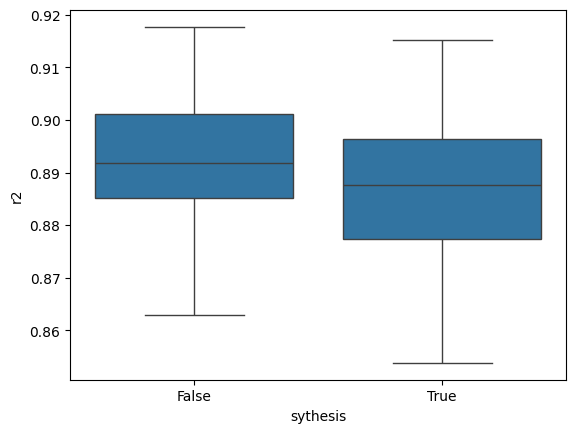

In [114]:
import seaborn as sns
sns.boxplot(data=performance_data, x="sythesis", y="r2")


In [99]:
r2_score(y_test.loc[["systhesis"],:], reg.predict(X_test.loc[["systhesis"],:]))

-0.02002159637310874

In [23]:
reg.fit(X_train.loc[["systhesis"],:], y_train.loc[["systhesis"],:])
r2_score(y_test.loc[["systhesis"],:], reg.predict(X_test.loc[["systhesis"],:]))

c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-0.004820566741245758

In [36]:
# data = pd.concat([feature,target],axis=1)

# reg = RandomForestRegressor(n_estimators=100)
# X_train, X_test, y_train, y_test = train_test_split(
#     feature, target, test_size=0.33, random_state=42)
# reg.fit(X_train, y_train)
# r2_score(y_test, reg.predict(X_test))

-0.3577185688438853

In [24]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=data.drop(columns=["Y"]),
    synthetic_data=synthetic_data.drop(columns=["Y"]),
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 74/74 [00:00<00:00, 1573.07it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 71.26it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [26]:
from sdv.evaluation.single_table import evaluate_quality

metadata_drop_target = SingleTableMetadata()
metadata_drop_target.detect_from_dataframe(data.drop(columns=["Y"]))

quality_report = evaluate_quality(
    real_data=data.drop(columns=["Y"]).reset_index(drop=True),
    synthetic_data=synthetic_data.drop(columns=["Y"]).reset_index(drop=True),
    metadata=metadata_drop_target)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 73/73 [00:00<00:00, 1013.33it/s]|
Column Shapes Score: 76.38%

(2/2) Evaluating Column Pair Trends: |██████████| 2628/2628 [00:16<00:00, 160.15it/s]|
Column Pair Trends Score: 88.07%

Overall Score (Average): 82.23%



In [58]:
quality_report.convert_datetimes(real_data=data.drop(columns=["Y"]),
    synthetic_data=synthetic_data.drop(columns=["Y"]),
    metadata=metadata_drop_target.to_dict())

In [65]:
"""
Column Shapes
The statistical similarity between the real and synthetic data for single columns of data. This is often called the marginal distribution of each column.

Column Pair Trends
The statistical similarity between the real and synthetic data for pairs of columns. This is often called the correlation or bivariate distributions of the columns.
"""
quality_report.get_details(property_name='Column Shapes') # Column Pair Trends

,Column,Metric,Score
0,x_0,KSComplement,0.806842
1,x_1,KSComplement,0.805567
2,x_2,KSComplement,0.813043
3,x_3,KSComplement,0.790845
4,x_4,KSComplement,0.719826
...,...,...,...
68,x_68,KSComplement,0.837115
69,x_69,KSComplement,0.752960
70,x_70,KSComplement,0.868253
71,x_71,KSComplement,0.877391


In [45]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data.drop(columns=["Y"]),
    synthetic_data=synthetic_data.drop(columns=["Y"]),
    metadata=metadata_drop_target,
    column_name='x_0'
)
    
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [28]:
import numpy as np

# 假设有四个动作：上 (0), 下 (1), 左 (2), 右 (3)
actions = [0, 1, 2, 3]

# Q 值表（示例）
Q = {
    (0, 0): [0.1, 0.2, 0.3, 0.4],
    (0, 1): [0.2, 0.3, 0.1, 0.5],
    # 其他状态的 Q 值...
}

def get_best_action(state):
    q_values = Q[state]
    print(q_values)
    best_action = actions[np.argmax(q_values)]
    return best_action

# 在状态 (0, 0) 下找到最佳动作
state = (0, 0)
best_action = get_best_action(state)
print(f"在状态 {state} 下的最佳动作是 {best_action}")


[0.1, 0.2, 0.3, 0.4]
在状态 (0, 0) 下的最佳动作是 3


In [35]:
import gym
import numpy as np
from stable_baselines3 import DQN
from gym import spaces

# 定义自定义环境
class CustomEnv(gym.Env):
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.action_space = spaces.Discrete(20)  # 20种动作
        self.observation_space = spaces.Discrete(9)  # 9种状态
        self.state = 0  # 初始状态
        self.max_steps = 100  # 定义一个最大步数限制
        self.current_step = 0

    def reset(self):
        self.state = 0
        self.current_step = 0
        return self.state

    def step(self, action):
        # 在这里定义状态转换和奖励机制
        self.current_step += 1
        reward = np.random.rand()  # 使用随机奖励作为示例
        done = self.current_step >= self.max_steps  # 判断是否结束
        self.state = (self.state + 1) % 9  # 状态循环变化
        return self.state, reward, done, {}

    def render(self, mode='human', close=False):
        # 在这里定义渲染逻辑（如果需要的话）
        pass

# 创建环境实例
env = CustomEnv()

# 初始化 DQN 模型
model = DQN("MlpPolicy", env, verbose=1)

# 训练模型
model.learn(total_timesteps=10000)

# 评估模型
state = env.reset()
total_rewards = 0
for _ in range(20):
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    total_rewards += reward
    if done:
        break

print(f"Total rewards: {total_rewards}")



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\foresight_User\anaconda3\envs\Python3.9.13\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 51       |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1139     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.244    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 50.1     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 980      |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.174    |
|    n_updates      

In [36]:
import gym
import numpy as np
from stable_baselines3 import DQN
from gym import spaces

# 定义自定义环境
class CustomEnv(gym.Env):
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.action_space = spaces.Discrete(20)  # 20种动作
        self.observation_space = spaces.Discrete(9)  # 9种状态
        self.state = 0  # 初始状态
        self.max_steps = 100  # 定义一个最大步数限制
        self.current_step = 0

    def reset(self):
        self.state = 0
        self.current_step = 0
        return self.state

    def step(self, action):
        # 在这里定义状态转换和奖励机制
        self.current_step += 1
        reward = np.random.rand()  # 使用随机奖励作为示例
        done = self.current_step >= self.max_steps  # 判断是否结束
        self.state = (self.state + 1) % 9  # 状态循环变化
        return self.state, reward, done, {}

    def render(self, mode='human', close=False):
        # 在这里定义渲染逻辑（如果需要的话）
        pass

# 创建环境实例
env = CustomEnv()

# 初始化 DQN 模型
model = DQN("MlpPolicy", env, verbose=1)

# 训练模型
model.learn(total_timesteps=10000)

# 找到特定输出下的最佳动作
def find_best_action_for_output(model, state):
    best_action = None
    best_reward = -float('inf')
    for action in range(env.action_space.n):
        next_state, reward, done, _ = env.step(action)
        if reward > best_reward:
            best_reward = reward
            best_action = action
    return best_action, best_reward

# 评估模型
state = env.reset()
total_rewards = 0
for _ in range(20):
    action, _ = model.predict(state)
    state, reward, done, _ = env.step(action)
    total_rewards += reward
    if done:
        break

print(f"Total rewards: {total_rewards}")

# 测试特定输出下的最佳动作
test_state = 3  # 假设测试状态为3
env.reset()
env.state = test_state  # 设置当前状态为测试状态
best_action, best_reward = find_best_action_for_output(model, test_state)

print(f"For state {test_state}, the best action is {best_action} with expected reward {best_reward}")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 50       |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1133     |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.203    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 51.4     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1021     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |        

In [53]:
import gym
from gym import spaces
import numpy as np

class CustomEnv(gym.Env):
    def __init__(self, s, Y_target):
        super(CustomEnv, self).__init__()
        self.s = np.array(s)  # 确保 s 是一个 NumPy 数组
        self.Y_target = np.array(Y_target)  # 确保 Y_target 是一个 NumPy 数组
        
        # 动作空间 (45个动作，每个动作的取值范围在 -10 到 10 之间)
        self.action_space = spaces.Box(low=-10, high=10, shape=(45,), dtype=np.float32)
        
        # 状态空间 (s + action + Y_target)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(104,), dtype=np.float32)
        
    def reset(self):
        # 重置环境状态
        return np.concatenate([self.s, np.zeros(45), self.Y_target])
        
    def step(self, action):
        # 执行动作，并返回新的状态，奖励，是否完成和额外信息
        Y_pred = self.model_predict(action)
        reward = -np.mean((Y_pred - self.Y_target) ** 2)
        
        state = np.concatenate([self.s, action, self.Y_target])
        done = True  # 假设每一步都是一个完整的episode
        
        return state, reward, done, {}
    
    def model_predict(self, action):
        # 模拟动作对输出的影响
        # 这里需要用你的模型进行预测
        return np.random.random(50)  # 这是一个占位符，需要替换为实际模型的预测

# 初始化环境
s = [[1, 2, 3, 4, 5, 6, 7, 8, 9],[1, 2, 3, 4, 5, 6, 7, 8, 9]]
Y_target = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
            41, 42, 43, 44, 45, 46, 47, 48, 49, 50],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
            41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]
env = CustomEnv(s, Y_target)



In [54]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [52]:
obs = np.concatenate([s, np.zeros(45), Y_target])  # 初始状态
action, _states = model.predict(obs, deterministic=True)
print("最佳动作:", action)


最佳动作: [-0.0394317  -0.0428356  -0.02839691  0.0147233   0.02107581 -0.00284855
 -0.00502155 -0.00142493 -0.02787788  0.0004645  -0.04453708 -0.00399367
 -0.04240382 -0.05257657  0.00386405  0.00639445  0.01846694 -0.0210955
 -0.05633891  0.02938847  0.02582844  0.08197403  0.00074855  0.05595892
 -0.01813643 -0.00291077  0.00333438 -0.03592161  0.02897857 -0.04252243
 -0.01320955  0.01383079 -0.03568113  0.02984208  0.09310154 -0.01341609
  0.06618296 -0.08386102  0.02563597 -0.05879968  0.00894209  0.01598232
 -0.01124746 -0.01722653  0.00282624]


In [55]:
import gym
from gym import spaces
import numpy as np

class CustomEnv(gym.Env):
    def __init__(self, samples):
        super(CustomEnv, self).__init__()
        self.samples = samples
        self.num_samples = len(samples)
        self.current_sample_idx = 0
        
        # 状态空间 (s1 到 s9 + Y1 到 Y50)
        self.state_dim = 59
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.state_dim,), dtype=np.float32)
        
        # 动作空间 (A1 到 A45)
        self.action_dim = 45
        self.action_space = spaces.Box(low=-10, high=10, shape=(self.action_dim,), dtype=np.float32)
        
    def reset(self):
        # 重置环境到第一个样本
        self.current_sample_idx = 0
        return self._get_state()
    
    def step(self, action):
        # 执行动作，并返回新的状态，奖励，是否完成和额外信息
        state = self._get_state()
        next_state = state.copy()  # 拷贝当前状态
        
        # 更新动作部分状态
        next_state[-self.action_dim:] = action
        
        # 获取对应样本的目标结果 Y1 到 Y50
        targets = self.samples[self.current_sample_idx]["targets"]
        
        # 计算奖励 (这里简单地使用负的均方误差作为奖励)
        reward = -np.mean((next_state[self.state_dim-len(targets):self.state_dim] - targets) ** 2)
        
        # 更新当前样本索引
        self.current_sample_idx += 1
        done = self.current_sample_idx >= self.num_samples
        
        return next_state, reward, done, {}
    
    def _get_state(self):
        # 获取当前状态 s1 到 s9 和 Y1 到 Y50
        state = np.zeros(self.state_dim)
        features = self.samples[self.current_sample_idx]["features"]
        targets = self.samples[self.current_sample_idx]["targets"]
        
        state[:len(features)] = features
        state[self.state_dim-len(targets):self.state_dim] = targets
        
        return state

# 示例数据
samples = []
for i in range(130):
    features = np.random.random(9)  # 随机生成 s1 到 s9
    targets = np.random.random(50)  # 随机生成 Y1 到 Y50
    samples.append({"features": features, "targets": targets})

# 初始化环境
env = CustomEnv(samples)


In [56]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 130      |
|    ep_rew_mean     | -155     |
| time/              |          |
|    fps             | 1734     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 130         |
|    ep_rew_mean          | -155        |
| time/                   |             |
|    fps                  | 1064        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.033754833 |
|    clip_fraction        | 0.356       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [63]:
#obs = env.reset()  # 重置环境到第一个样本
action, _states = model.predict(observation=np.random.random(len(obs)), deterministic=True)
print("最佳动作:", action)


最佳动作: [-0.05087741  0.06108237 -0.02466066  0.06107406 -0.09314553 -0.10913216
 -0.1094081   0.15599707  0.15020806 -0.0181678   0.0373911  -0.04300985
 -0.20533876 -0.10693577  0.10385709  0.02176548 -0.12347705  0.0454868
 -0.10778381  0.05419123 -0.01125018  0.02097259  0.04625898 -0.05067059
  0.07759216 -0.00557548  0.0518217  -0.05111513  0.07882007 -0.0011643
 -0.06349957  0.08842579 -0.08219336  0.01018562 -0.0294676  -0.03727307
 -0.1103459  -0.09520719  0.00386253 -0.13080601  0.14371556  0.03265418
 -0.05033871  0.11311994  0.12174454]


In [83]:
import numpy as np
import mdptoolbox

# 示例数据
num_samples = 130
num_features = 9
num_actions = 45
num_targets = 50

# 生成随机数据作为示例
samples = []
for i in range(num_samples):
    features = np.random.random(num_features)
    targets = np.random.random(num_targets)
    samples.append({"features": features, "targets": targets})

# 构建状态空间和动作空间
state_space_size = num_features + num_targets
action_space_size = num_actions

# 构建MDP的奖励矩阵
R = np.zeros((action_space_size, state_space_size, state_space_size))

for a in range(action_space_size):
    for s in range(state_space_size):
        features = samples[s]["features"]
        targets = samples[s]["targets"]
        
        # 模拟动作对应的状态转移
        next_features = features  # 假设状态转移不变
        next_targets = targets + np.random.random(num_targets) * 0.1  # 添加一些随机噪声
        
        # 构建下一个状态的完整向量
        next_state = np.concatenate((next_features, next_targets))
        
        # 计算奖励（负均方误差）
        reward = -np.mean((next_targets - samples[s]["targets"]) ** 2)
        
        # 更新奖励矩阵
        R[a, s, :] = reward  # 这里简化为直接使用 reward，实际应根据转移后状态评估
        
# 构建MDP的状态转移概率矩阵（这里简单假设为均匀随机）
P = np.ones((action_space_size, state_space_size, state_space_size)) / state_space_size

# 定义MDP问题
mdp = mdptoolbox.mdp.QLearning(transitions=P, reward=R, discount=0.95)

# 求解MDP
mdp.run()

# 获取最佳策略（最优动作组合）
best_policy = mdp.policy

print("最佳策略（最优动作组合）：", best_policy)

### 這個方法輸出不對，但程式能跑

最佳策略（最优动作组合）： (11, 39, 17, 11, 14, 20, 23, 32, 8, 31, 26, 17, 33, 16, 44, 19, 42, 34, 12, 17, 32, 28, 25, 6, 36, 41, 29, 20, 32, 15, 20, 28, 25, 42, 36, 21, 33, 40, 19, 21, 13, 10, 44, 34, 14, 27, 18, 7, 21, 12, 31, 44, 13, 31, 19, 41, 35, 15, 36)


In [84]:
reward

-0.003409432019614695

In [77]:
R.shape

(45, 59, 59)

In [81]:
len(best_policy)

59